In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pandas.read_csv('dataset/books.csv')

In [4]:
df.columns

Index([' isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count'],
      dtype='object')

## Questions that can be asked from the dataset

1. What is a good length for a book?
2. Is there any correlation with the categories and average rating? (since pop culture may influence people towards a more popular genre hence higher ratings)
3. Are older books generally rated higher?
4. Based on the description can we create a category classifier?
5. Can we create a recommendation system solely on the categories and the description?

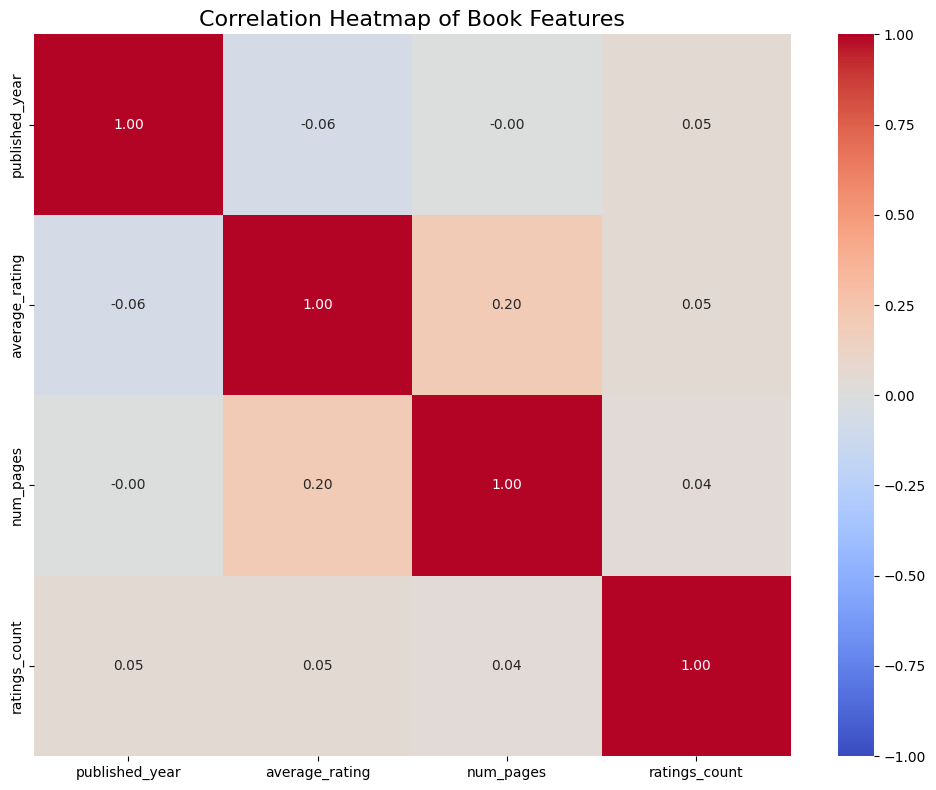

In [5]:
# Create a correlation matrix of the numerical columns
correlation_matrix = df[['published_year', 'average_rating', 'num_pages', 'ratings_count']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap of Book Features', fontsize=16)
plt.tight_layout()
plt.show()

### Good length for a book.

The Correlation heat map shows weak positive correaltion with the number of pages and the avearage ratings. 

But we can deduce that there must be a range of number of pages that achieves good results, lets do that

In [6]:
# Get high average rating with high rating counts
high_rating_books = df[(df['average_rating'] > 4.0) & (df['ratings_count'] > 1000)]


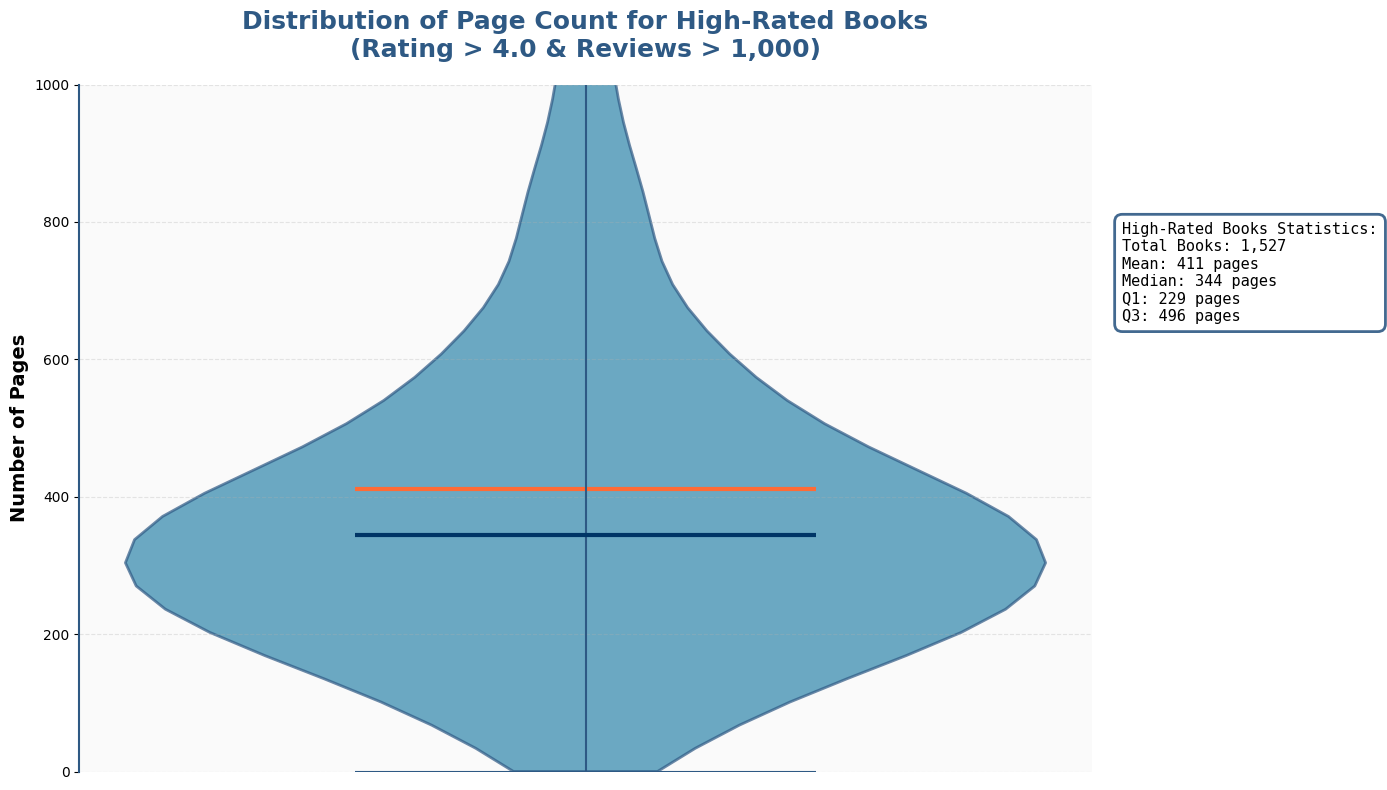

In [7]:
plt.figure(figsize=(14, 8))

# Use a custom color palette
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
custom_palette = sns.color_palette(colors)

# Create the violin plot with enhanced styling
violin_parts = plt.violinplot(high_rating_books['num_pages'].dropna(), 
                             positions=[1], 
                             widths=0.6,
                             showmeans=True, 
                             showmedians=True, 
                             showextrema=True)

# Customize the violin plot colors
pc = violin_parts['bodies'][0] # type: ignore
pc.set_facecolor(colors[0])
pc.set_alpha(0.7)
pc.set_edgecolor('#2E5984')
pc.set_linewidth(2)

# Customize other elements
violin_parts['cmeans'].set_color('#FF6B35')
violin_parts['cmeans'].set_linewidth(3)
violin_parts['cmedians'].set_color('#003566')
violin_parts['cmedians'].set_linewidth(3)
violin_parts['cbars'].set_color('#2E5984')
violin_parts['cmaxes'].set_color('#2E5984')
violin_parts['cmins'].set_color('#2E5984')

# Add statistical annotations
mean_pages = high_rating_books['num_pages'].mean()
median_pages = high_rating_books['num_pages'].median()
q25 = high_rating_books['num_pages'].quantile(0.25)
q75 = high_rating_books['num_pages'].quantile(0.75)
total_books = len(high_rating_books)

# Create a text box with statistics
stats_text = f"""High-Rated Books Statistics:
Total Books: {total_books:,}
Mean: {mean_pages:.0f} pages
Median: {median_pages:.0f} pages
Q1: {q25:.0f} pages
Q3: {q75:.0f} pages"""

stats_box = dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.9, 
                edgecolor='#2E5984', linewidth=2)
plt.text(1.35, 800, stats_text, fontsize=11, verticalalignment='top',
         bbox=stats_box, fontfamily='monospace')

# Enhance the plot styling
plt.title('Distribution of Page Count for High-Rated Books\n(Rating > 4.0 & Reviews > 1,000)', 
          fontsize=18, fontweight='bold', pad=20, color='#2E5984')
plt.ylabel('Number of Pages', fontsize=14, fontweight='semibold')
plt.xlabel('')

# Set y-axis limits and styling
plt.ylim(0, 1000)
plt.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)

# Remove x-axis ticks and labels
plt.xticks([])

# Add some visual enhancements
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_color('#2E5984')
plt.gca().spines['left'].set_linewidth(1.5)

# Add subtle background color
plt.gca().set_facecolor('#FAFAFA')

plt.tight_layout()
plt.show()


Hence we see that the best number of pages lie around **250-500** with better among more moderate **350-400**

### Does Popculture influence tastes?

Lets first see what categories are there.

<Axes: ylabel='categories'>

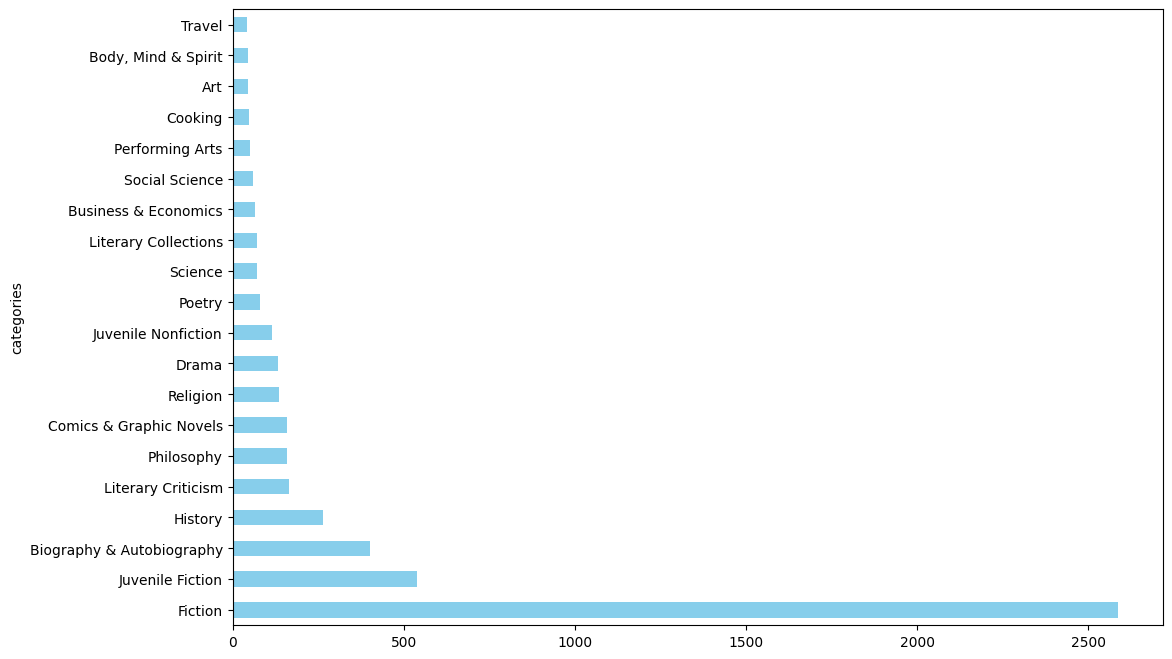

In [8]:
df.categories.value_counts().head(20).plot(kind='barh', figsize=(12, 8), color='skyblue')

Woah! There is a high imabalance between categories, Fiction has nearly 5x the amount of books than the second highest! 

Definitly some bias with the number of books. But lets still see what is the distribution looking like with the ratings

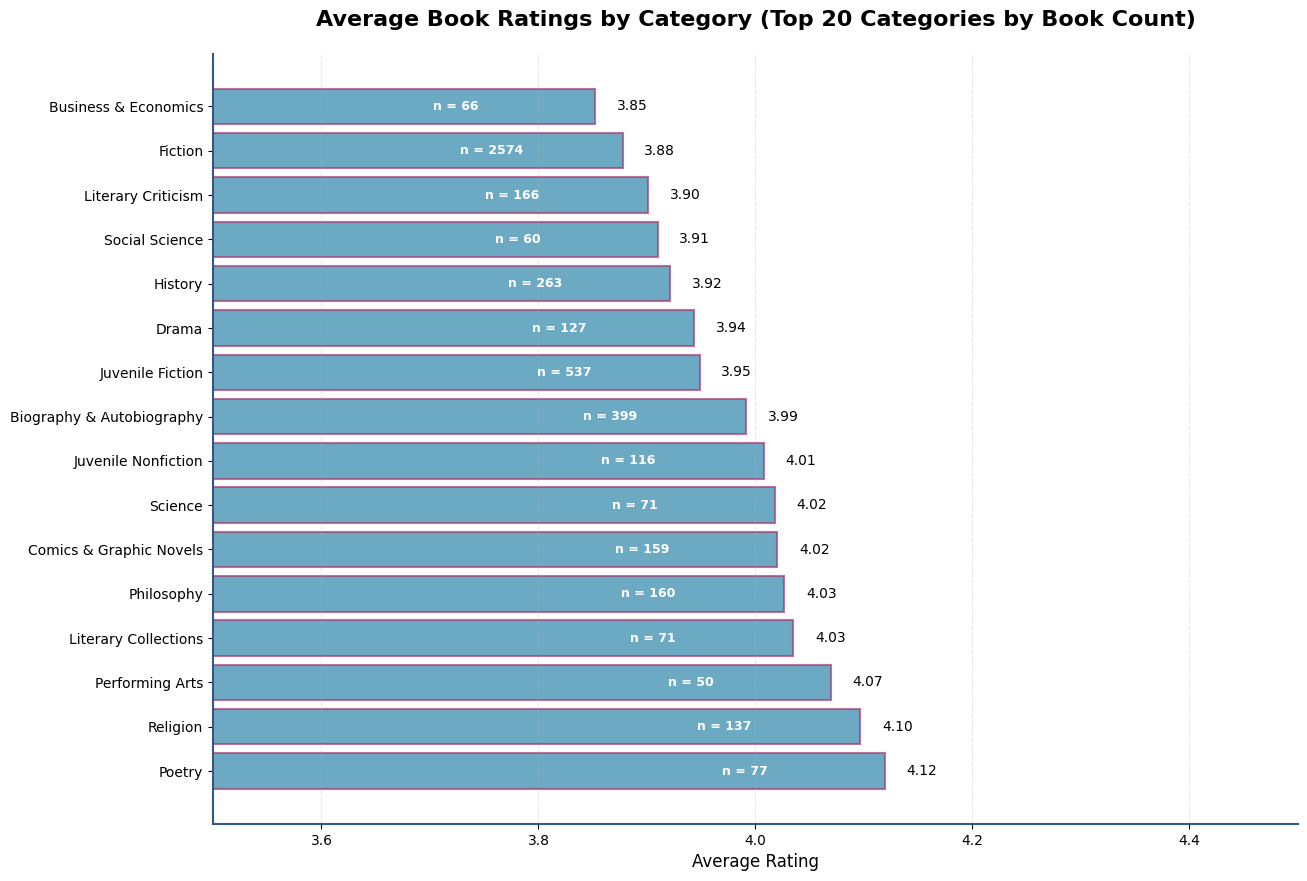

In [9]:
# Get top categories and their average ratings
category_ratings = df.groupby('categories')['average_rating'].agg(['mean', 'count']).sort_values('count', ascending=False)
category_ratings = category_ratings[category_ratings['count'] >= 50]  # Filter for categories with at least 50 books
category_ratings = category_ratings.sort_values('mean', ascending=False)

# Create a bar chart showing average ratings by category
plt.figure(figsize=(14, 10))

# Plot with custom styling
bars = plt.barh(y=category_ratings.index[:20], 
                width=category_ratings['mean'][:20],
                color=colors[0],
                alpha=0.7,
                edgecolor=colors[1],
                linewidth=1.5)

# Add count annotations to the bars
for i, (idx, row) in enumerate(category_ratings[:20].iterrows()):
    plt.annotate(f"n = {int(row['count'])}", 
                 xy=(row['mean'] - 0.15, i),
                 va='center',
                 color='white',
                 fontweight='bold',
                 fontsize=9)

# Add rating values at the end of each bar
for i, v in enumerate(category_ratings['mean'][:20]):
    plt.text(v + 0.02, i, f'{v:.2f}', va='center', fontsize=10)

# Customize the plot
plt.xlim(3.5, 4.5)  # Focus on the range where most ratings fall
plt.title('Average Book Ratings by Category (Top 20 Categories by Book Count)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Average Rating', fontsize=12)
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_color('#2E5984')
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['left'].set_color('#2E5984')

**Key Findings:**
1. **Fiction isn't necessarily the highest-rated despite popularity**

Fiction has by far the most books (n=2574) but ranks relatively low in average rating (3.88)
This suggests that popularity/volume doesn't correlate with higher ratings

2. **Niche categories tend to have higher ratings**

Poetry (4.12), Religion (4.10), and Performing Arts (4.07) have the highest average ratings
These categories have smaller sample sizes (50-137 books) but more engaged/selective audiences
3. Rating range is quite narrow

All categories fall between 3.85-4.12, suggesting readers are generally positive
The difference between highest and lowest is only 0.27 


4. **Academic/Specialized genres perform well**

Philosophy (4.03), Science (4.02), and Literary Collections (4.03) rank highly
These likely attract more dedicated readers who appreciate quality content


5. **Popular culture vs. critical appreciation gap**

Business & Economics (3.85) and Fiction (3.88) rank lowest despite being widely read
This supports the hypothesis that pop culture influence might lead to more critical/varied opinions
Answer to your research question:

Yes, pop culture does seem to influence ratings - the most popular categories (Fiction, Business) have lower average ratings, possibly because they attract broader, more diverse audiences with varying tastes, while niche categories benefit from self-selecting, enthusiastic readers.

### Are Older Books Generally higher rated?

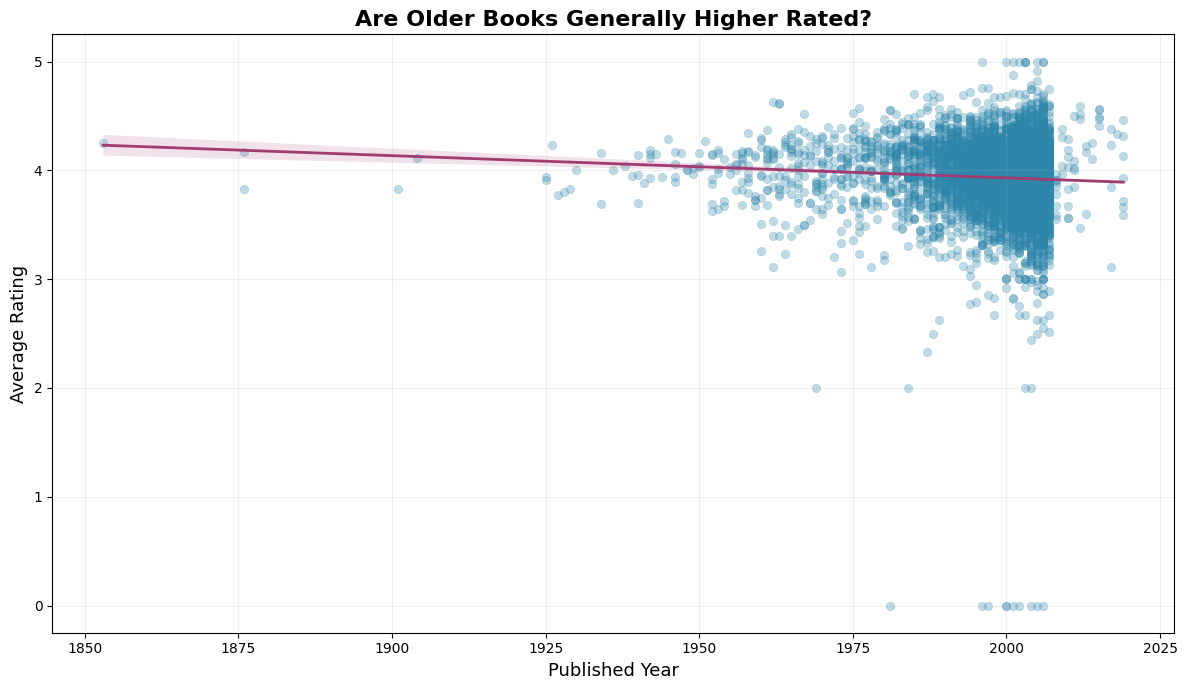

In [10]:
# Scatter plot: published_year vs average_rating
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df, 
    x='published_year', 
    y='average_rating', 
    alpha=0.3, 
    color=colors[0], 
    edgecolor=None
)

# Add a trend line (linear regression)
sns.regplot(
    data=df, 
    x='published_year', 
    y='average_rating', 
    scatter=False, 
    color=colors[1], 
    line_kws={'linewidth': 2}
)

plt.title('Are Older Books Generally Higher Rated?', fontsize=16, fontweight='bold')
plt.xlabel('Published Year', fontsize=13)
plt.ylabel('Average Rating', fontsize=13)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

We see there is a weak correlation here


### Comparing 20th vs 21st Century Book Ratings

Let's visualize how average ratings differ between books published in the 20th century (1900–1999) and the 21st century (2000–present). We'll use a violin plot for a clear comparison.


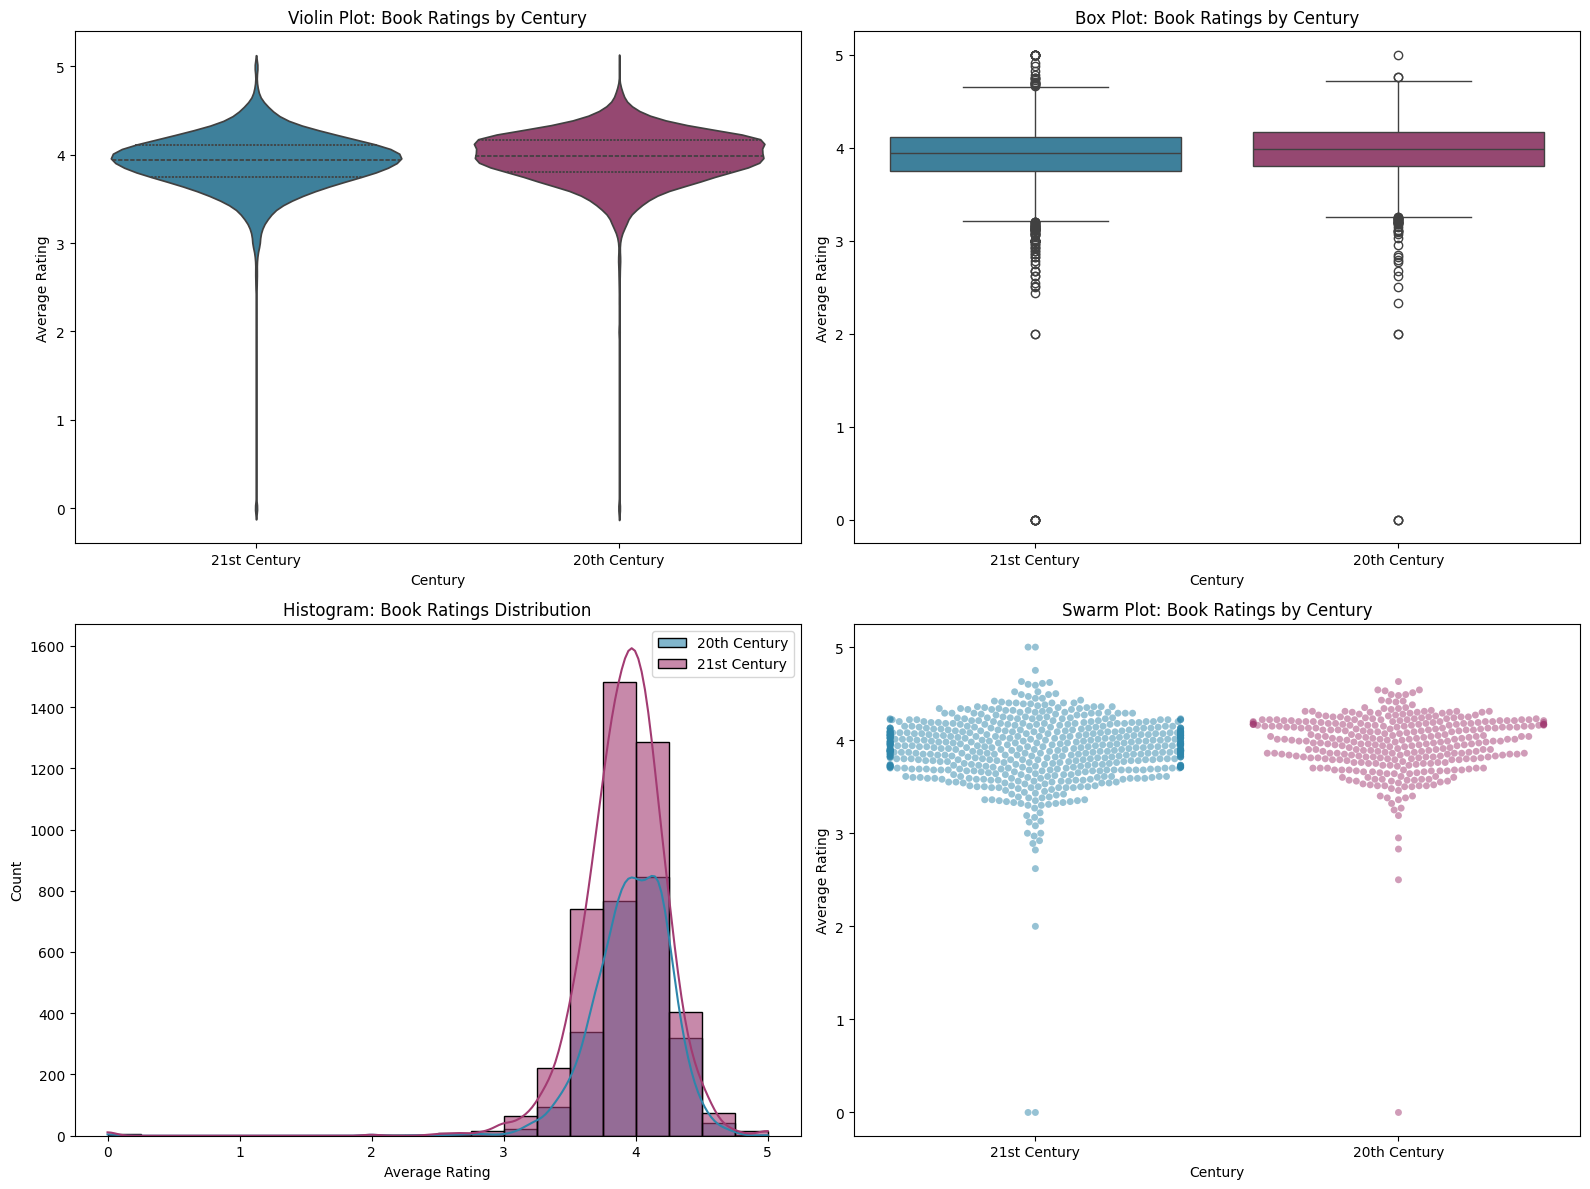

In [11]:
# Create a new column for century if not already present
if 'century' not in df.columns:
    df['century'] = np.where(df['published_year'] < 2000, '20th Century', '21st Century')

# Filter out rows with missing ratings or published_year
century_ratings = df.dropna(subset=['average_rating', 'published_year'])

plt.figure(figsize=(16, 12))

# Violin plot
plt.subplot(2, 2, 1)
sns.violinplot(
    data=century_ratings,
    x='century',
    y='average_rating',
    palette=custom_palette[:2],
    inner='quartile'
)
plt.title('Violin Plot: Book Ratings by Century')
plt.xlabel('Century')
plt.ylabel('Average Rating')

# Box plot
plt.subplot(2, 2, 2)
sns.boxplot(
    data=century_ratings,
    x='century',
    y='average_rating',
    palette=custom_palette[:2]
)
plt.title('Box Plot: Book Ratings by Century')
plt.xlabel('Century')
plt.ylabel('Average Rating')

# Histogram
plt.subplot(2, 2, 3)
for i, century in enumerate(['20th Century', '21st Century']):
    sns.histplot(
        century_ratings[century_ratings['century'] == century]['average_rating'], # type: ignore
        bins=20, kde=True, color=colors[i], label=century, alpha=0.6
    )
plt.title('Histogram: Book Ratings Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.legend()

# Swarm plot (for a sense of density)
plt.subplot(2, 2, 4)
sns.swarmplot(
    data=century_ratings.sample(n=min(1000, len(century_ratings)), random_state=42),  # sample for speed
    x='century',
    y='average_rating',
    palette=custom_palette[:2],
    alpha=0.5
)
plt.title('Swarm Plot: Book Ratings by Century')
plt.xlabel('Century')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()

We see that the average rating has not gone down, but we can make an argument that the ratings have gone up! (considering there is a higher data on post 2000 books)

### Can we create a Category Classifier?

Yes! we definitly can make a BERT classifier on this, but the question should be wether the classifier would be a high performing classifier or not. 

The issue is the class imbalance, there is a high class imbalance between the different categories, since we have almost 40% of the dataset is Fiction we will need to balance it out 

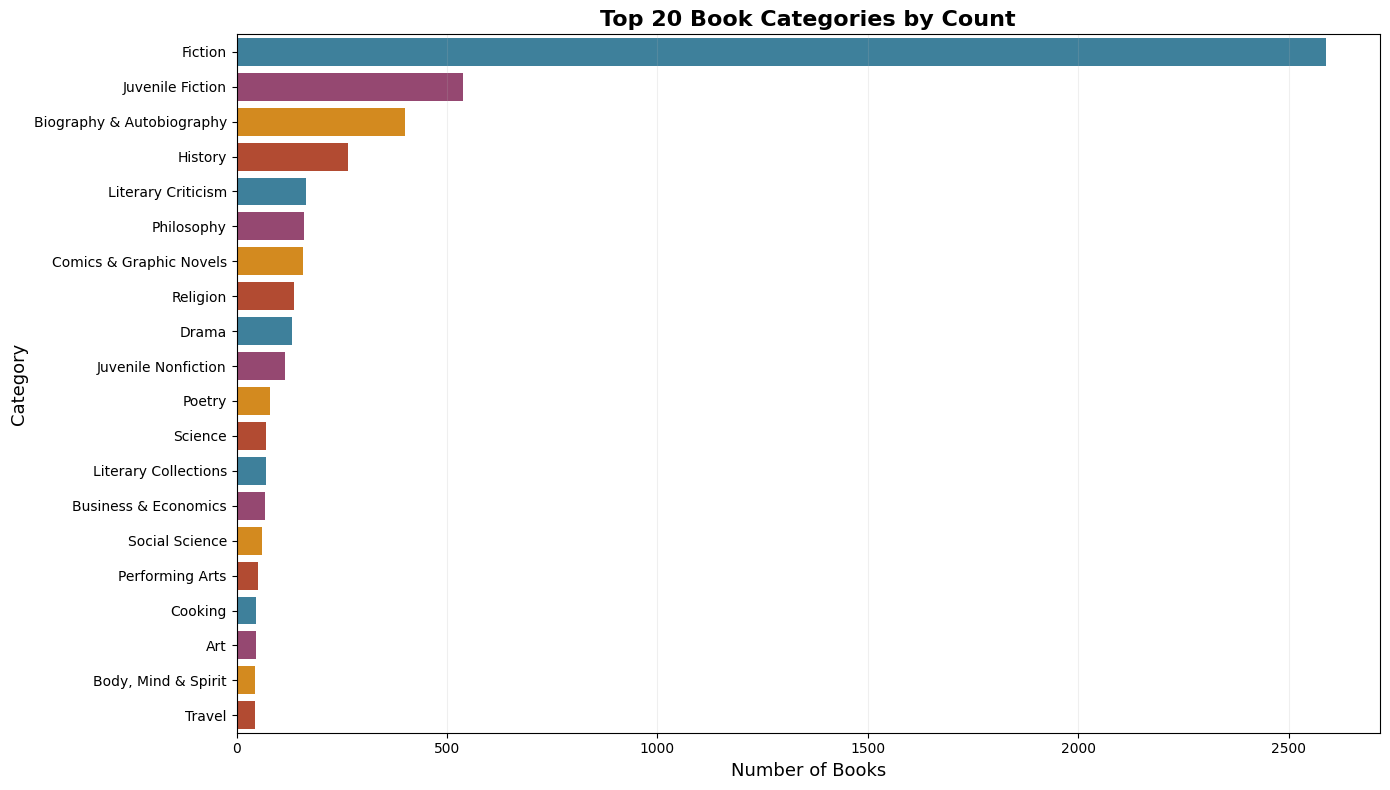

Fiction books: 2588 (38.0% of dataset)


In [12]:
plt.figure(figsize=(14, 8))
category_counts = df['categories'].value_counts().head(20)
sns.barplot(
    y=category_counts.index,
    x=category_counts.values,
    palette=custom_palette
)
plt.title('Top 20 Book Categories by Count', fontsize=16, fontweight='bold')
plt.xlabel('Number of Books', fontsize=13)
plt.ylabel('Category', fontsize=13)
plt.grid(axis='x', alpha=0.2)
plt.tight_layout()
plt.show()

# Show the proportion of the largest category
total_books = len(df)
fiction_count = df['categories'].value_counts().get('Fiction', 0)
print(f"Fiction books: {fiction_count} ({fiction_count/total_books:.1%} of dataset)")

In [ ]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize

# Download required NLTK data if not already present
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('stopwords', quiet=True)

# Define POS tags to exclude (common parts of speech)
exclude_pos = {'CC', 'DT', 'IN', 'TO', 'PRP', 'PRP$', 'MD', 'RB', 'RBR', 'RBS', 'UH', 'EX', 'WDT', 'WP', 'WP$', 'WRB'}

# Prepare stopwords set
stop_words = set(stopwords.words('english'))

# Group by category and process descriptions
category_words = {}

for cat, group in df.dropna(subset=['categories', 'description']).groupby('categories'):
    all_desc = ' '.join(group['description'].astype(str)).lower()
    tokens = [w for w in word_tokenize(all_desc) if w.isalpha() and w not in stop_words]
    tagged = pos_tag(tokens)
    filtered = [word for word, pos in tagged if pos not in exclude_pos]
    most_common = Counter(filtered).most_common(10)
    category_words[cat] = most_common

# Example: print top 10 words for top 5 categories
for cat in list(category_words.keys())[:5]:
    print(f"Category: {cat}")
    print(category_words[cat])
    print()

Category: 87th Precinct (Imaginary place)
[('found', 2), ('precinct', 2), ('lieutenant', 2), ('byrnes', 2), ('two', 1), ('bitter', 1), ('cold', 1), ('winter', 1), ('young', 1), ('hispanic', 1)]

Category: Abandoned mines
[('something', 1), ('sinister', 1), ('happening', 1), ('mysterious', 1), ('isle', 1), ('gloom', 1), ('children', 1), ('determined', 1), ('uncover', 1), ('truth', 1)]

Category: Aboriginal Australians
[('aboriginal', 2), ('twins', 2), ('story', 2), ('geoff', 2), ('beatrice', 2), ('taken', 2), ('bestselling', 1), ('author', 1), ('message', 1), ('comes', 1)]

Category: Abused wives
[('keith', 3), ('landry', 3), ('years', 2), ('spencerville', 2), ('annie', 2), ('baxter', 2), ('man', 2), ('working', 1), ('shadowy', 1), ('world', 1)]

Category: Accidents
[('story', 1), ('ordinary', 1), ('man', 1), ('driven', 1), ('brink', 1), ('murder', 1), ('madness', 1), ('delusions', 1), ('begins', 1), ('windy', 1)]



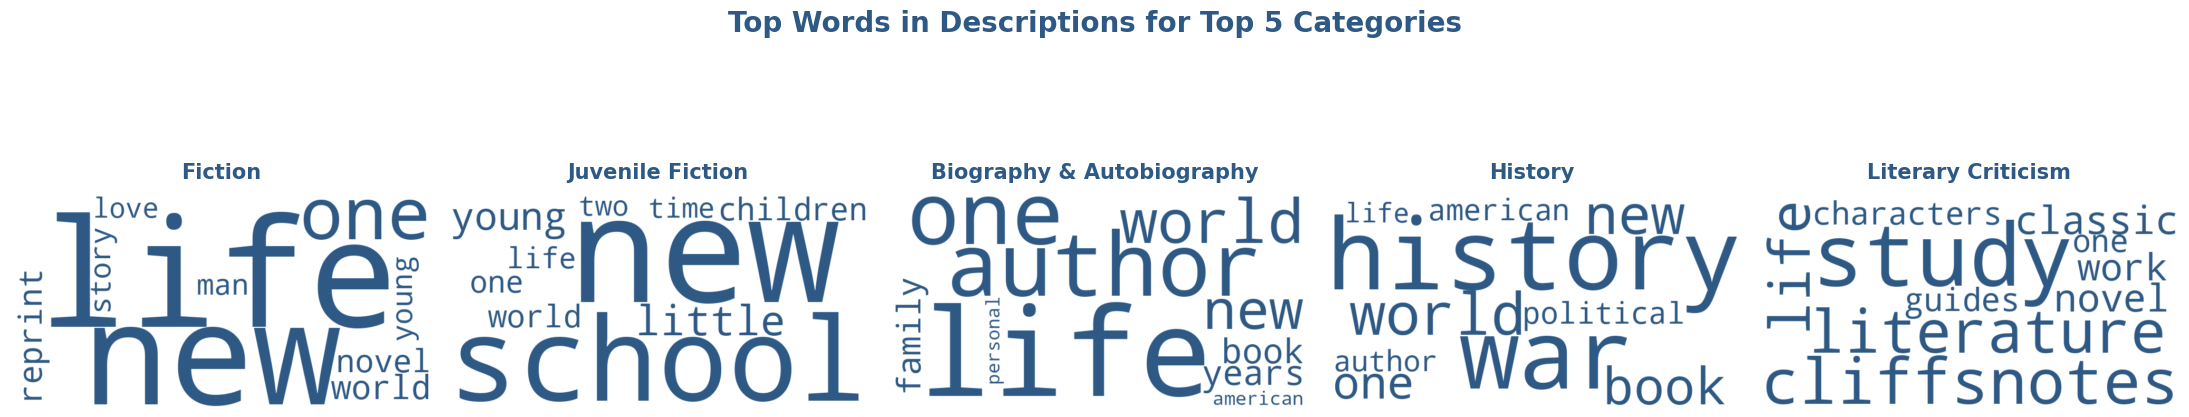

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a custom color palette for wordclouds
wordcloud_colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#003566']

# Sort top_5_categories by their counts in category_counts (descending)
top_5_categories = sorted(category_words.keys(), key=lambda x: category_counts.get(x, 0), reverse=True)[:5]

fig, axes = plt.subplots(1, 5, figsize=(25, 6))

for i, (cat, ax) in enumerate(zip(top_5_categories, axes)):
    word_freq = dict(category_words[cat])
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='tab10',
        contour_width=2,
        contour_color=wordcloud_colors[i % len(wordcloud_colors)],
        prefer_horizontal=1.0,
        max_words=100,
        font_path=None,
        random_state=42
    ).generate_from_frequencies(word_freq)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(
        f"{cat}",
        fontsize=16,
        fontweight='bold',
        color=wordcloud_colors[i % len(wordcloud_colors)],
        pad=15
    )
    ax.set_facecolor('#FAFAFA')

plt.suptitle("Top Words in Descriptions for Top 5 Categories", fontsize=22, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()


In [18]:
category_words['Fiction']

[('life', 513),
 ('new', 504),
 ('one', 491),
 ('world', 453),
 ('reprint', 420),
 ('novel', 402),
 ('man', 330),
 ('story', 328),
 ('young', 318),
 ('love', 292)]